# Analysis of Uniqlo Sales

Uniqlo is the core brand of Japan's Fast Retailing Company, founded in 1984 as a small clothing store selling suits. Uniqlo has become an internationally renowned clothing brand. Tadashi Yanai, the current chairman and general manager of Uniqlo, introduced the hypermarket style of clothing sales in Japan for the first time, and realized the low cost of store operation through a unique system of commodity planning, development and sales, thus leading to the hot selling trend of Uniqlo.

In this analysis, I will analyze the sales data of Uniqlo in China. Explore how sales have changed over time, how different products have sold, how customers prefer to buy, and the relationship between sales and product costs.

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
uniqlo = pd.read_csv(r"/Users/ny/Desktop/数据分析训练/zuoyeweek1.unique.csv")

# Basic Info

In [3]:
uniqlo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      22293 non-null  int64  
 1   city          22293 non-null  object 
 2   channel       22293 non-null  object 
 3   gender_group  22293 non-null  object 
 4   age_group     22293 non-null  object 
 5   wkd_ind       22293 non-null  object 
 6   product       22293 non-null  object 
 7   customer      22293 non-null  int64  
 8   revenue       22293 non-null  float64
 9   order         22293 non-null  int64  
 10  quant         22293 non-null  int64  
 11  unit_cost     22293 non-null  int64  
 12  unit_price    22293 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 2.2+ MB


In [4]:
uniqlo.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,199
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,149
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,89
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,59
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,22


In [5]:
uniqlo.describe()

,store_id,customer,revenue,order,quant,unit_cost,unit_price
count,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000
mean,335.391558,1.629480,159.531371,1.651998,1.858072,46.124658,84.279998
std,230.236167,1.785605,276.254066,1.861480,2.347301,19.124347,46.314296
min,19.000000,1.000000,-0.660000,1.000000,1.000000,9.000000,0.000000
25%,142.000000,1.000000,64.000000,1.000000,1.000000,49.000000,56.000000
50%,315.000000,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000
75%,480.000000,2.000000,175.000000,2.000000,2.000000,49.000000,99.000000
max,831.000000,58.000000,12538.000000,65.000000,84.000000,99.000000,299.000000


# Data Cleaning

In [6]:
import numpy as np
uniqlo.loc[uniqlo.age_group =='Unknown','age_group']=np.nan
uniqlo.loc[uniqlo.gender_group =='Unknown','gender_group']=np.nan 

In [7]:
uniqlo.isnull().sum()/len(uniqlo)

store_id        0.0
city            0.0
channel         0.0
gender_group    0.0
age_group       0.0
wkd_ind         0.0
product         0.0
customer        0.0
revenue         0.0
order           0.0
quant           0.0
unit_cost       0.0
unit_price      0.0
dtype: float64

In [8]:
uniqlo.dropna()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,199
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,149
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,89
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,59
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22288,146,杭州,线下,Female,30-34,Weekday,短裤,1,80.0,1,2,19,40
22289,430,成都,线下,Female,25-29,Weekend,T恤,1,79.0,1,1,49,79
22290,449,武汉,线下,Female,35-39,Weekday,T恤,1,158.0,1,2,49,79
22291,758,杭州,线下,Female,20-24,Weekday,袜子,1,26.0,1,1,9,26


In [9]:
uniqlo.drop('store_id',axis=1,inplace=True)

In [10]:
uniqlo.describe()

,customer,revenue,order,quant,unit_cost,unit_price
count,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000
mean,1.629480,159.531371,1.651998,1.858072,46.124658,84.279998
std,1.785605,276.254066,1.861480,2.347301,19.124347,46.314296
min,1.000000,-0.660000,1.000000,1.000000,9.000000,0.000000
25%,1.000000,64.000000,1.000000,1.000000,49.000000,56.000000
50%,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000
75%,2.000000,175.000000,2.000000,2.000000,49.000000,99.000000
max,58.000000,12538.000000,65.000000,84.000000,99.000000,299.000000


Clean the max of revenue.

In [11]:
uniqlo.revenue.value_counts()

79.00      3656
99.00      3114
59.00      1608
39.00      1196
198.00      793
           ... 
426.38        1
156.81        1
292.82        1
110.51        1
1038.00       1
Name: revenue, Length: 1411, dtype: int64

In [12]:
bins=[-1000,0,100,500,1000,2000,5000,10000,15000]
uniqlo['revenue_level']=pd.cut(uniqlo.revenue, bins,right=False)

In [13]:
uniqlo.groupby('revenue_level').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
revenue_level,,,,,,,,
"[-1000, 0)",1.0,-0.660000,NaN,-0.66,-0.66,-0.66,-0.66,-0.66
"[0, 100)",13735.0,69.398428,24.057206,0.00,53.00,79.00,89.00,99.00
"[100, 500)",7662.0,221.046232,93.959692,100.00,149.00,198.00,271.00,498.00
"[500, 1000)",671.0,684.615633,134.712670,505.00,592.00,643.00,780.75,997.00
"[1000, 2000)",162.0,1358.550617,257.825041,1009.00,1155.25,1293.00,1541.25,1990.00
"[2000, 5000)",51.0,2949.593725,831.873589,2050.00,2328.79,2683.00,3410.00,4975.00
"[5000, 10000)",9.0,6295.780000,1308.101226,5039.59,5241.43,5947.00,6636.00,8836.00
"[10000, 15000)",2.0,11518.140000,1442.299844,10498.28,11008.21,11518.14,12028.07,12538.00


In [14]:
uniqlo= uniqlo[(uniqlo.revenue>0)&(uniqlo.revenue<2000)]
uniqlo.revenue.describe()

count    22200.000000
mean       149.833600
std        171.650825
min         10.000000
25%         65.000000
50%         99.000000
75%        168.447500
max       1990.000000
Name: revenue, dtype: float64

In [15]:
uniqlo.describe()

,customer,revenue,order,quant,unit_cost,unit_price
count,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000,22200.000000
mean,1.576757,149.833600,1.595676,1.786396,46.121622,84.202838
std,1.325953,171.650825,1.356642,1.697348,19.129522,46.035829
min,1.000000,10.000000,1.000000,1.000000,9.000000,10.000000
25%,1.000000,65.000000,1.000000,1.000000,49.000000,56.000000
50%,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000
75%,2.000000,168.447500,2.000000,2.000000,49.000000,99.000000
max,21.000000,1990.000000,21.000000,33.000000,99.000000,299.000000


# Relationships between revenue and time points

In [16]:
uniqlo.groupby('wkd_ind').revenue.sum()

wkd_ind
Weekday    1927993.60
Weekend    1398312.33
Name: revenue, dtype: float64

In [17]:
( 1398312.33)/(1927993.60/5)

3.6263406942844623

In [18]:
uniqlo.groupby('wkd_ind').customer.sum()

wkd_ind
Weekday    20378
Weekend    14626
Name: customer, dtype: int64

In [19]:
(14626/2)/(20378/5)

1.794337030130533

In [20]:
uniqlo.groupby('wkd_ind').revenue.sum()/uniqlo.groupby('wkd_ind').customer.sum()

wkd_ind
Weekday    94.611522
Weekend    95.604562
dtype: float64

<AxesSubplot:xlabel='wkd_ind', ylabel='revenue'>

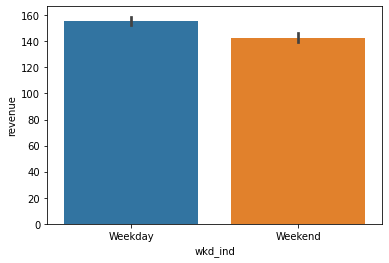

In [21]:
sns.barplot(x='wkd_ind',y='revenue',data=uniqlo)

In [22]:
uniqlo.groupby('wkd_ind').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
wkd_ind,,,,,,,,
Weekday,12407.0,155.395631,178.598728,10.0,66.0,99.0,189.0,1990.0
Weekend,9793.0,142.786922,162.157413,10.0,59.0,99.0,158.0,1872.0


There were more weekday customers than weekend customers, and average revenues were almost same. 
More promotional activities should be carried out on weekends to attract more customers.

# Product sales

<AxesSubplot:xlabel='product', ylabel='revenue'>

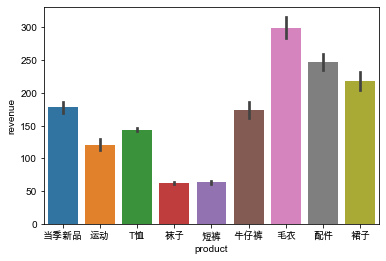

In [23]:
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False
sns.barplot(x='product',y='revenue',data=uniqlo)

In [24]:
uniqlo.groupby('product').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
product,,,,,,,,
T恤,10593.0,143.773987,134.573492,13.50,79.0,99.0,158.0,1841.00
当季新品,2501.0,177.931971,220.967333,19.00,76.0,108.0,195.0,1990.00
毛衣,805.0,298.951304,239.705271,13.00,149.0,199.0,396.0,1842.00
牛仔裤,1409.0,173.201192,233.340250,13.33,59.0,79.0,199.0,1890.00
短裤,1691.0,63.563501,55.631526,10.00,37.0,40.0,77.0,676.00
袜子,2048.0,62.368828,51.153136,10.00,27.0,52.0,79.0,595.36
裙子,629.0,218.287409,172.449212,10.00,99.0,197.0,237.0,1442.00
运动,975.0,121.087528,142.760425,18.00,39.0,78.0,149.0,1257.00
配件,1549.0,247.271524,254.756086,29.00,99.0,149.0,298.0,1964.64


In [25]:
uniqlo.groupby('product').revenue.mean().sort_values(ascending=False).index

Index(['毛衣', '配件', '裙子', '当季新品', '牛仔裤', 'T恤', '运动', '短裤', '袜子'], dtype='object', name='product')

<AxesSubplot:xlabel='product', ylabel='revenue'>

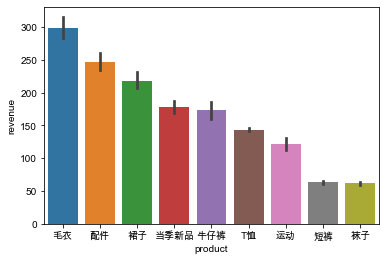

In [26]:
sns.barplot(x='product',y='revenue',data=uniqlo, 
            order=uniqlo.groupby('product').revenue.mean().sort_values(ascending=False).index)

<AxesSubplot:xlabel='product', ylabel='revenue'>

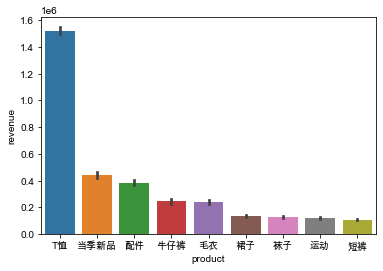

In [27]:
sns.barplot(y='revenue',x='product',data=uniqlo,estimator=sum,
            order=uniqlo.groupby('product').revenue.sum().sort_values(ascending=False).index)

Sweaters have the highest average sales volume and T-shirts have the highest total sales price,
probably because T-shirts are cheap and sweaters are expensive

# Purchase channels

<AxesSubplot:xlabel='city', ylabel='revenue'>

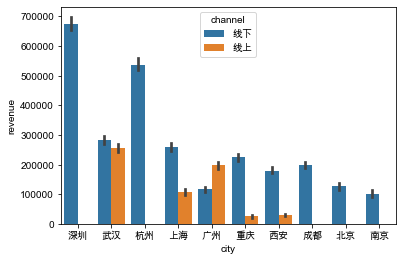

In [28]:
sns.barplot(x='city',y='revenue',hue='channel', data=uniqlo, estimator=sum, order=uniqlo.groupby('city').revenue.sum().sort_values(ascending=False).index)

<AxesSubplot:xlabel='gender_group', ylabel='revenue'>

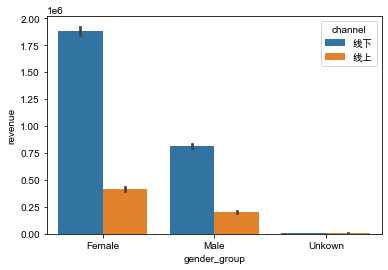

In [29]:
sns.barplot(x='gender_group',y='revenue',hue='channel', data=uniqlo, estimator=sum, order=uniqlo.groupby('gender_group').revenue.sum().sort_values(ascending=False).index)

<AxesSubplot:xlabel='gender_group', ylabel='revenue'>

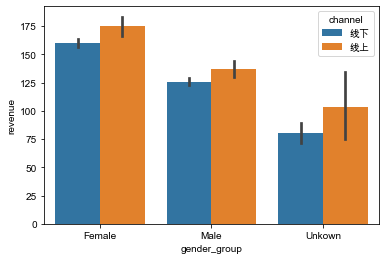

In [30]:
sns.barplot(x='gender_group',y='revenue',hue='channel', data=uniqlo, order=uniqlo.groupby('gender_group').revenue.mean().sort_values(ascending=False).index)

<AxesSubplot:xlabel='age_group', ylabel='revenue'>

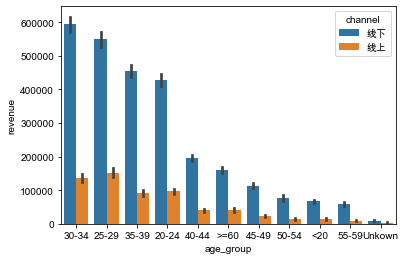

In [31]:
sns.barplot(x='age_group',y='revenue',hue='channel', data=uniqlo, estimator=sum, order=uniqlo.groupby('age_group').revenue.sum().sort_values(ascending=False).index)

In big cities such as Beijing and Shanghai, the online sales data are missing, 
and the purchase rate of the whole population is higher offline than online. 
Women are generally more likely to buy online than men. 
Online and offline purchases are concentrated between 20 and 40 years old

# Relationship between sales and product costs

In [32]:
uniqlo['unit_revenue']= uniqlo.revenue/uniqlo.quant
uniqlo['margin']=uniqlo.unit_revenue-uniqlo.unit_cost
uniqlo.head()

,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price,revenue_level,unit_revenue,margin
0,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,199,"[500, 1000)",199.000000,140.000000
1,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,149,"[100, 500)",149.000000,100.000000
2,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,89,"[100, 500)",89.000000,40.000000
3,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,59,"[0, 100)",59.000000,10.000000
4,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,22,"[0, 100)",21.666667,12.666667


<AxesSubplot:xlabel='product', ylabel='margin'>

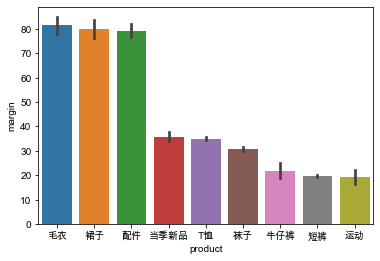

In [33]:
sns.barplot(y='margin',x='product',data=uniqlo,order=uniqlo.groupby('product').margin.mean().sort_values(ascending=False).index)

In [34]:
q=['margin','unit_revenue','unit_cost']
uniqlo[q].corr()

,margin,unit_revenue,unit_cost
margin,1.000000,0.910633,0.104207
unit_revenue,0.910633,1.000000,0.505862
unit_cost,0.104207,0.505862,1.000000


<AxesSubplot:>

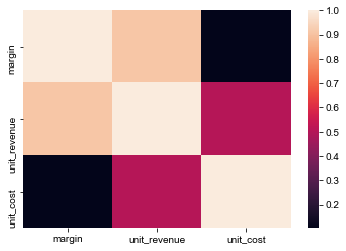

In [35]:
sns.heatmap(uniqlo[q].corr())

In [36]:
bins = [-100,-25,0,25,50,100,150,200]
uniqlo['margin_level']=pd.cut(uniqlo.margin, bins, right=False)
uniqlo.groupby('margin_level').margin.describe()

,count,mean,std,min,25%,50%,75%,max
margin_level,,,,,,,,
"[-100, -25)",453.0,-35.743363,10.082787,-86.0,-40.0,-30.0,-30.0,-25.250000
"[-25, 0)",2333.0,-9.918304,4.793668,-25.0,-10.0,-10.0,-10.0,-0.165000
"[0, 25)",6157.0,14.097948,5.670898,0.0,10.0,14.0,20.0,24.728889
"[25, 50)",4859.0,32.389526,5.342885,25.0,30.0,30.0,30.0,49.928571
"[50, 100)",6270.0,57.784182,13.000221,50.0,50.0,50.0,70.0,99.454545
"[100, 150)",1658.0,119.761014,15.997128,100.0,100.0,120.0,136.0,149.627143
"[150, 200)",399.0,158.354367,10.495074,150.0,150.0,150.0,170.0,195.000000


<AxesSubplot:xlabel='product', ylabel='quant'>

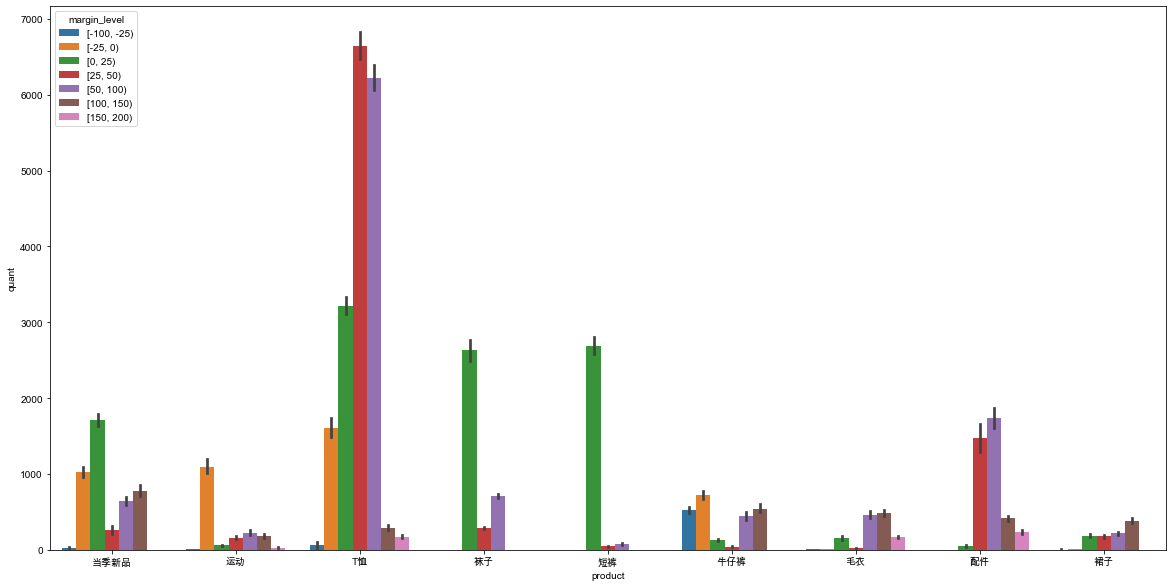

In [37]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x='product',y='quant',hue='margin_level',estimator=sum,data=uniqlo)

Some jeans are showing negative margin. Tshirts are often sold in large quantities but with a small profit